<a href="https://colab.research.google.com/github/carvalheirafc/deep_learning_stuff/blob/master/neural_networks/diabetes/task3/diabetes_Seq_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy 
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics


In [0]:
file_path = 'https://raw.githubusercontent.com/carvalheirafc/deep_learning_stuff/master/neural_networks/diabetes/diabetes_pca_result.csv'
df = pd.read_csv(file_path)
features = df.drop('Diagnóstico', axis = 1)
target = df['Diagnóstico']


print('Data Shape:', features.shape)
print('Labels/Target:', target.shape)
df.describe().transpose()

Data Shape: (768, 4)
Labels/Target: (768,)


,count,mean,std,min,25%,50%,75%,max
Component 1,768.0,-6.693141e-17,1.711960,-5.587340,-1.027072,0.152931,1.095689,5.963579
Component 2,768.0,-6.071532e-17,1.318184,-2.955806,-1.007096,-0.225966,0.959128,3.606582
Component 3,768.0,-3.324887e-17,1.015629,-3.203088,-0.646496,-0.103940,0.549774,4.754503
Component 4,768.0,2.349105e-18,0.966941,-2.192185,-0.664677,-0.115829,0.543242,4.125987
Diagnóstico,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [0]:
def get_train_test(X, y, n_splts=10):
  k_fold = StratifiedKFold(n_splits=n_splts, shuffle=True)

  X_train = []
  X_test = []
  y_train = []
  y_test = []
  
  for train_indices, test_indices in k_fold.split(X, y):
    X_train.append( X[train_indices] )
    y_train.append( y[train_indices] )
    X_test.append( X[test_indices] )
    y_test.append( y[test_indices] )
      

  return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test) 

In [0]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 1))
y_true = tf.placeholder(dtype=tf.float32, shape=(None, 1))

In [0]:
def model():
  network = tf.keras.Sequential()

    
  network.add(tf.layers.Dense(units=32, activation='relu', input_shape=(features.shape[1],),
                              kernel_initializer='random_uniform', bias_initializer='ones'))

    
  network.add(tf.layers.Dense(units=32, activation='relu'))
  network.add(tf.layers.Dense(units=1, activation='sigmoid'))
  return network

In [0]:
def train_predict(optimizer, seed, X, y):
  with tf.device('/gpu:0'):
    #class_prediction, y_test = [], []
    network = model()
    k_fold = StratifiedKFold(n_splits=25, shuffle=True, random_state=seed)
    cvscores = []
    prediction_acc = []
  
    network.compile(loss='mse', optimizer=optimizer, metrics=['accuracy', 'mse'])
    X_train = []
    for train, test in k_fold.split(X, y):
      X_train.append(X[train])
      history = network.fit(X[train], y[train], epochs=50, batch_size=10, verbose=0)
      
      scores = network.evaluate(X[test], y[test], verbose=1)
      
      class_prediction = network.predict_classes(X[test])
      y_test = y[test]
      cvscores.append(scores[1] * 100)
      
      print(scores)
    
  print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
  return history, class_prediction, y_test

In [0]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

sess = tf.Session(config=config)
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def gpu(X, y, seed, optmizer):
  history_, pred_class, class_  = train_predict(optmizer, seed, X, y)
  
  return history_, pred_class, class_

In [0]:
X = features.values
y = target.values
seed = 666
numpy.random.seed(seed)

adam_custom = tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8,amsgrad=True)
history, pred_class, class_o = gpu(X, y, seed, adam_custom)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
31/31 [==============================] - 0s 1ms/sample - loss: 0.1751 - acc: 0.7419 - mean_squared_error: 0.1751
[0.17505699396133423, 0.7419355, 0.175057]
31/31 [==============================] - 0s 45us/sample - loss: 0.1989 - acc: 0.7419 - mean_squared_error: 0.1989
[0.19891226291656494, 0.7419355, 0.19891226]
31/31 [==============================] - 0s 44us/sample - loss: 0.2305 - acc: 0.6129 - mean_squared_error: 0.2305
[0.23051343858242035, 0.61290324, 0.23051344]
31/31 [==============================] - 0s 45us/sample - loss: 0.1665 - acc: 0.7419 - mean_squared_error: 0.1665
[0.16645638644695282, 0.7419355, 0.16645639]
31/31 [==============================] - 0s 44us/sample - loss: 0.2106 - acc: 0.7419 - mean_squared_error: 0.2106
[0.21059633791446686, 0.7419355, 0.21059634]
31/31 [==============================] 

In [0]:
class_o

array([0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.])

In [0]:
flat_pred = []
flat_y = []
for sublist in pred_class:
  for item in sublist:
    flat_pred.append(item)
    #print(type(item) 

In [0]:
d = {'Resposta': flat_pred, 
     'Target': class_o}

results = pd.DataFrame(data=d)
results.reset_index(drop=True,inplace=True)
results.dropna(inplace=True)
results.to_csv('./diabetes_prediciton.csv')
results.head()

,Resposta,Target
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0


In [0]:
target_positive = results[results['Target'] == 1]
target_negative = results[results['Target'] == 0]

def get_positive(tresh_hold = 0.5):
  true_positive = target_positive[target_positive['Resposta'] >= tresh_hold]
  false_positive = target_positive[target_positive['Resposta'] < tresh_hold] 
  
  return len(true_positive), len(false_positive)


def get_negative(tresh_hold = 0.5):
  true_negative = target_negative[target_negative['Resposta'] <= tresh_hold]
  false_negative = target_negative[target_negative['Resposta'] > tresh_hold] 
  
  return len(true_negative), len(false_negative)

'''
Calculates:
Acuracy
Positive and Negative Precision
False Positive and False Negative Amount

@param true_positive amount of True Positive in the dataset.
@oaran true_negative amount of True Negative in the dataset.
@param false_positive amount of False Positive in the dataset.
@param false_negative amount of False Negative in the dataset.
@param positives Total of Positives targets, targets = 1
@param negatives Total of Negatives targets, targets = 0
@param Threshold Value used to calc the true, false positives and negatives
@param debug Default False, if True print all stats

'''
def calc_stats(true_positive, 
               true_negative, 
               false_positive, 
               false_negative, 
               positives, 
               negatives, 
               threshold, 
               debug=False):
  
  acuracy = (true_positive + true_negative)/ (positives + negatives)

  precision_positive = true_positive / (true_positive + false_positive)
  precision_negative = true_negative / (true_negative + false_negative)

  false_positive_amount = false_positive / negatives
  false_negative_amount = false_negative / positives
  if debug == True:
    print('Threshold: '+str(threshold))
    print('Accuracy: '+str(acuracy))
    print('Positive Precision: '+str(precision_positive))
    print('Negative Precision: '+str(precision_negative))
    print('Amount False Positives: '+str(false_positive_amount))
    print('Amount False Negatives: '+str(false_negative_amount))
    print('\n')
  
  return acuracy

In [0]:
threshold = [0.0, 
             0.1, 0.2, 
             0.3, 0.4, 
             0.5, 0.6,
             0.7, 0.8,
             0.9, 1.0]

for t in threshold:
  true_positive, false_positive = get_positive(t)
  true_negative, false_negative = get_negative(t)

  
  calc_stats(true_positive, 
             true_negative, 
             false_positive, 
             false_negative, 
             len(target_positive), 
             len(target_negative),
             t, True)

Threshold: 0.0
Accuracy: 0.8666666666666667
Positive Precision: 1.0
Negative Precision: 0.8
Amount False Positives: 0.0
Amount False Negatives: 0.4


Threshold: 0.1
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amount False Positives: 0.05
Amount False Negatives: 0.4


Threshold: 0.2
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amount False Positives: 0.05
Amount False Negatives: 0.4


Threshold: 0.3
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amount False Positives: 0.05
Amount False Negatives: 0.4


Threshold: 0.4
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amount False Positives: 0.05
Amount False Negatives: 0.4


Threshold: 0.5
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amount False Positives: 0.05
Amount False Negatives: 0.4


Threshold: 0.6
Accuracy: 0.8333333333333334
Positive Precision: 0.9
Negative Precision: 0.8
Amo

In [0]:
tresh_hold = []
for it in results['Resposta']:
  if it <= 0.5:
     tresh_hold.append(0)
  else:
     tresh_hold.append(1)
      

matrix_cf = pd.DataFrame(metrics.confusion_matrix(results['Target'], tresh_hold), 
                         index=['Negative', 'Positive'],
                         columns=['True', 'False'])

Text(0.5, 1.0, 'Consfuison Matrix')

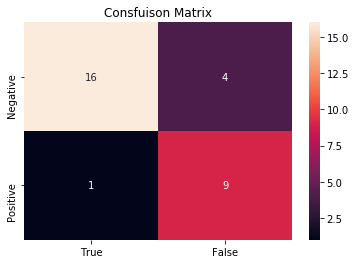

In [0]:
fig, ax = plt.subplots()
ax = sns.heatmap(matrix_cf, annot=True)
ax.set_title('Consfuison Matrix')

In [0]:
y = results['Target']
scores = results['Resposta']
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

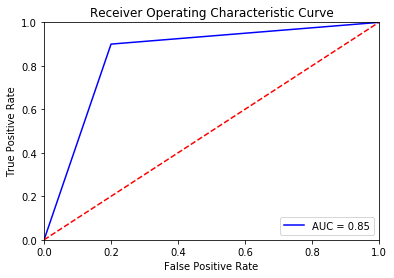

In [0]:
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()